In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('driver_file.csv')

In [3]:
df.head(3)

,Abs_Throttle_Position,Engine_RPM,Vehicle_Speed,Abs_Load_Value,Label
0,16.1,881,0,18.0,0
1,16.1,887,0,18.0,0
2,16.1,890,0,17.6,0


In [4]:
df.isnull().sum()

Abs_Throttle_Position    0
Engine_RPM               0
Vehicle_Speed            0
Abs_Load_Value           0
Label                    0
dtype: int64

# Train Test starts here

In [6]:
X = df.drop('Label', axis=1)
y = df['Label']

In [9]:
X.head(2)

,Abs_Throttle_Position,Engine_RPM,Vehicle_Speed,Abs_Load_Value
0,16.1,881,0,18.0
1,16.1,887,0,18.0


In [60]:
y.head(2)

0    0
1    0
Name: Label, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split , cross_val_score
X_train,X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [106]:
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.fit_transform(X_test)

In [19]:
#X_train_scaled

array([[-0.62855624, -0.96115349, -0.91206017, -0.41728995],
       [-0.62855624,  0.40126931,  1.16994568, -0.76444806],
       [-0.62855624, -1.13760315, -1.36467013, -0.50642514],
       ...,
       [-0.62855624, -1.3444253 , -1.27414814, -0.28593282],
       [ 0.40311152,  0.08742032,  0.12894276,  0.65233235],
       [ 2.34507438,  0.33040019,  0.26472575,  1.53430161]])

# Model Training starts here

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
models = {
    'dtc' : DecisionTreeClassifier(),
    'rfc' : RandomForestClassifier(),
    'knc' : KNeighborsClassifier(),
    'svc' : SVC(),
    'nbc' : GaussianNB(),
}

In [28]:
#for name,mod in models.items():
 #   mod.fit(X_train_scaled, y_train)
  #  y_pred = mod.predict(X_test_scaled)
   # acc = accuracy_score(y_test, y_pred)
    #print(f"{name} Accuracy: {acc}")

dtc Accuracy: 0.8517431192660551
rfc Accuracy: 0.8838532110091744
knc Accuracy: 0.8706422018348624
svc Accuracy: 0.7310091743119266
nbc Accuracy: 0.64


In [11]:
for name, model in models.items():
    # Calculate cross-validated accuracy scores
    scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Print mean and standard deviation of cross-validated accuracy scores
    print(f"{name} Cross-validated Accuracy: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})")

    # Fit the model on the entire training set
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy on the test set
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Test Accuracy: {acc:.2f}\n")

dtc Cross-validated Accuracy: 0.88 (+/- 0.00)
dtc Test Accuracy: 0.89

rfc Cross-validated Accuracy: 0.91 (+/- 0.00)
rfc Test Accuracy: 0.91

knc Cross-validated Accuracy: 0.87 (+/- 0.00)
knc Test Accuracy: 0.88

svc Cross-validated Accuracy: 0.78 (+/- 0.01)
svc Test Accuracy: 0.78

nbc Cross-validated Accuracy: 0.70 (+/- 0.00)
nbc Test Accuracy: 0.70



In [14]:
feature_importances = rfc.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print(importance_df)

                 Feature  Importance
1             Engine_RPM    0.401547
2          Vehicle_Speed    0.279117
3         Abs_Load_Value    0.204874
0  Abs_Throttle_Position    0.114462


In [13]:
rfc = RandomForestClassifier()

# Calculate cross-validated accuracy scores
scores = cross_val_score(rfc, X_train, y_train, cv=5)

# Print mean and standard deviation of cross-validated accuracy scores
print(f"Random Forest Cross-validated Accuracy: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})")

# Fit the Random Forest model on the entire training set
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Calculate accuracy on the test set
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest Test Accuracy: {acc:.2f}\n")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Random Forest Cross-validated Accuracy: 0.91 (+/- 0.00)
Random Forest Test Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1276
           1       0.91      0.94      0.93      3013
           2       0.85      0.78      0.81      1161

    accuracy                           0.91      5450
   macro avg       0.91      0.89      0.90      5450
weighted avg       0.91      0.91      0.91      5450



In [28]:
def prediction(input_data):
    
    # Scale the selected features using the same scaler used during training
    transformed_features = scaler.fit_transform(input_data)
    
    # Make predictions using the random forest classifier
    predicted_value = rfc.predict(transformed_features).reshape(1,-1)
    
    return predicted_value[0]


#input_data = np.array([[21.6, 1587, 30, 23.9]])  

#result = prediction(input_data)
#print(result)

In [29]:
input_data = pd.DataFrame({
    'Abs_Throttle_Position': [21.6],
    'Engine_RPM': [1259],
    'Vehicle_Speed': [30],
    'Abs_Load_Value': [23.9]
})

result = prediction(input_data)
print(result)

[1]


# pickle files

In [221]:
import pickle
pickle.dump(rfc,open('rfc.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))

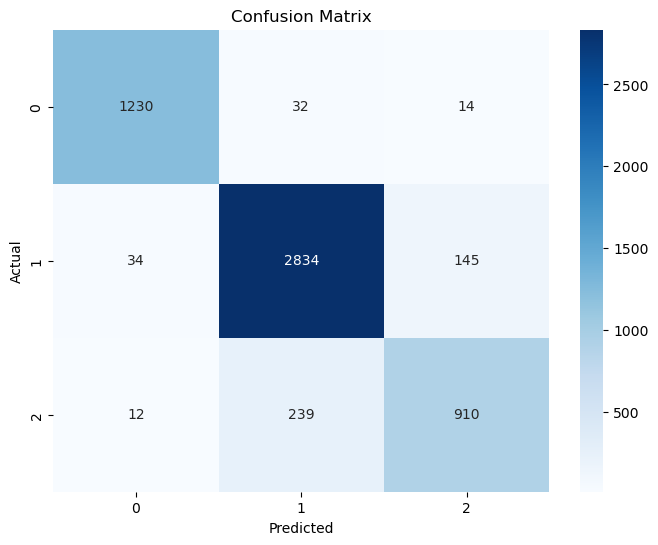

In [222]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


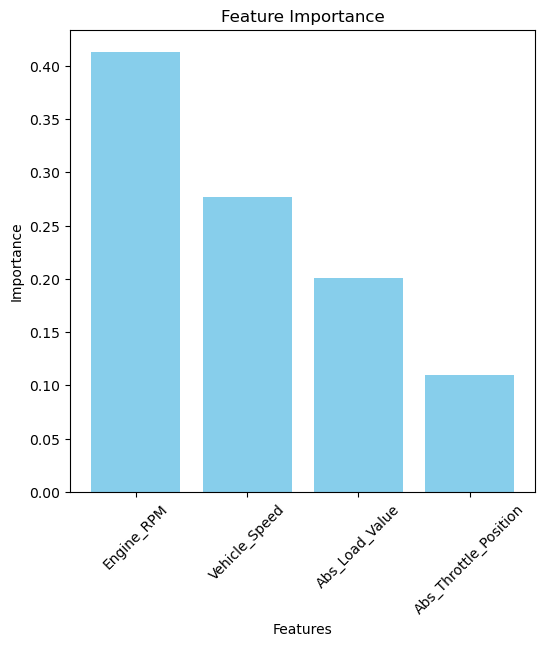

In [195]:
import matplotlib.pyplot as plt

feature_importance = {
    'Engine_RPM': 0.413070,
    'Vehicle_Speed': 0.277000,
    'Abs_Load_Value': 0.200697,
    'Abs_Throttle_Position': 0.109234
}

# Sort the feature importance dictionary by importance values
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and importance values
features = [item[0] for item in sorted_feature_importance]
importance_values = [item[1] for item in sorted_feature_importance]

# Plot bar chart
plt.figure(figsize=(6, 6))
plt.bar(features, importance_values, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()


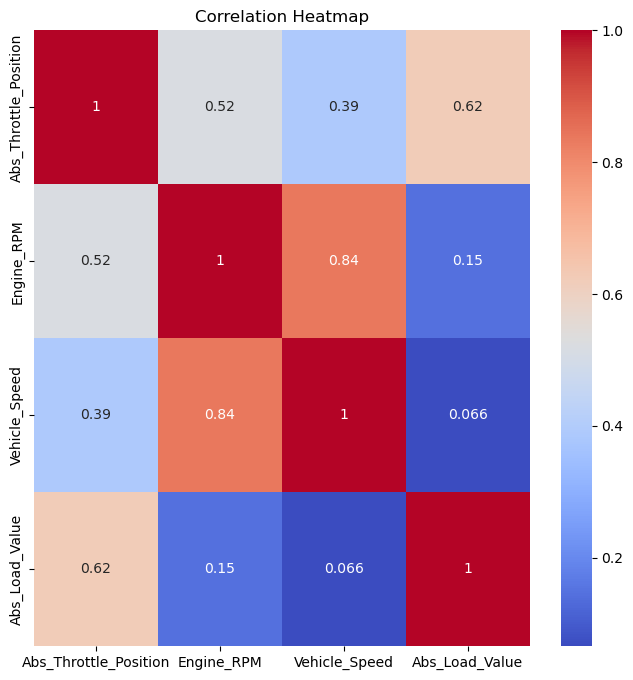

In [194]:
correlation_matrix = X.corr()

# Plot heatmap of correlations
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


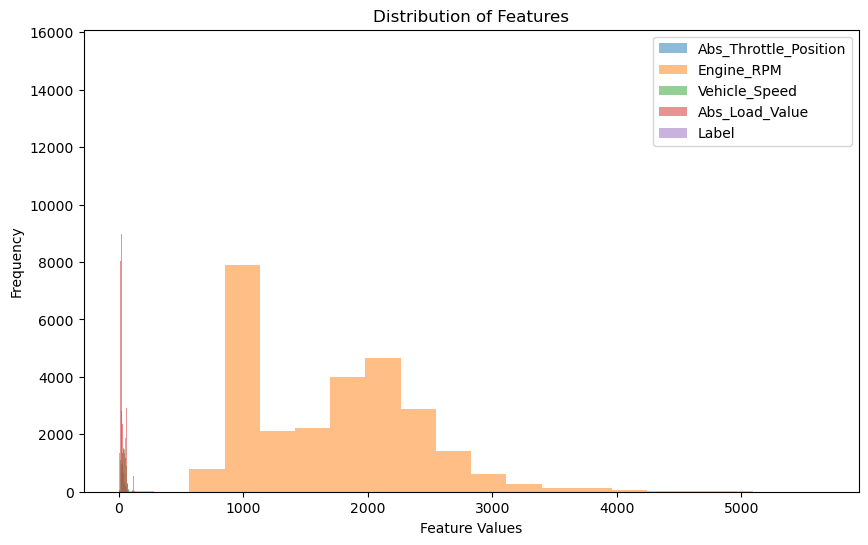

In [191]:
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.hist(df[column], bins=20, alpha=0.5, label=column)
plt.legend()
plt.title('Distribution of Features')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.show()

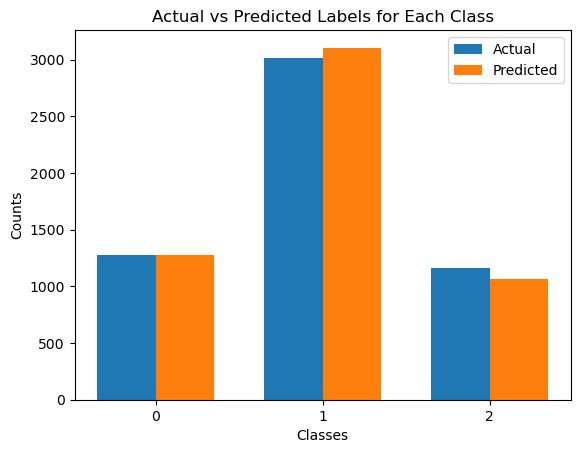

In [219]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the unique classes from the actual labels
classes = np.unique(y_test)

# Calculate counts of actual and predicted labels for each class
actual_counts_test = [np.sum(y_test == i) for i in classes]
predicted_counts_test = [np.sum(y_pred == i) for i in classes]

# Set up the bar plot
x = np.arange(len(classes))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, actual_counts_test, width, label='Actual')
bars2 = ax.bar(x + width/2, predicted_counts_test, width, label='Predicted')

# Add labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Counts')
ax.set_title('Actual vs Predicted Labels for Each Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Display the plot
plt.show()


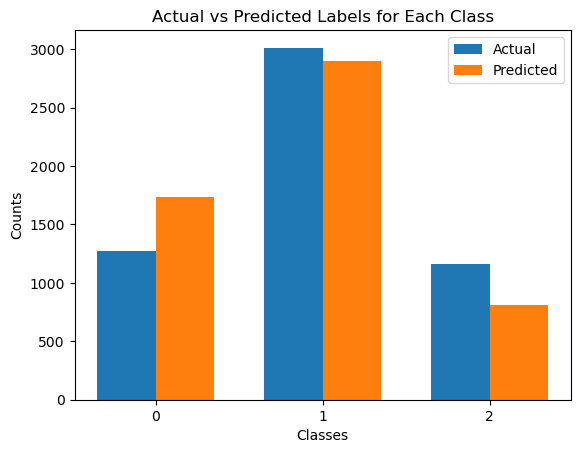

In [220]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the unique classes from the actual labels
classes = np.unique(y_test)

# Calculate counts of actual and predicted labels for each class
actual_counts_test = [np.sum(y_test == i) for i in classes]
predicted_counts_test = [np.sum(y_pred_nbc == i) for i in classes]

# Set up the bar plot
x = np.arange(len(classes))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, actual_counts_test, width, label='Actual')
bars2 = ax.bar(x + width/2, predicted_counts_test, width, label='Predicted')

# Add labels, title, and legend
ax.set_xlabel('Classes')
ax.set_ylabel('Counts')
ax.set_title('Actual vs Predicted Labels for Each Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Display the plot
plt.show()
